# A/B testing with Kaggle product analytics dataset

Data provided by Kaggle: https://www.kaggle.com/podsyp/how-to-do-product-analytics

Context:

Online store of sporting goods: clothing, shoes, accessories and sports nutrition.

Content:

On the main page of the store they show users banners in order to stimulate their sales. Now one of 5 banners is randomly displayed there. Each banner advertises a specific product or the entire company. Our marketers believe that the experience with banners can vary by segment, and their effectiveness may depend on the characteristics of user behavior.

Acknowledgements:

The manager of the company had an offer from partners to sell this place for a banner and advertise another service there (payment is assumed according to the CPC (cost-per-click) model).

Inspiration:

Help the manager make a decision.
Does the banner advertised significantly impact the user experience?
How do users behave in each segment?

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import scipy.stats as stats

In [2]:
## load the dataset
df = pd.read_csv('product.csv')
df

,order_id,user_id,page_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:59:15,banner_click,0
...,...,...,...,...,...,...,...,...
8471215,70c275428b8d53eef294d0529253b694,59e736f90b5f8003072bf0eb271ddb86,7bc3a33568d00773d5b58d6c7348bf3e,accessories,desktop,2019-05-23 14:07:00,banner_show,0
8471216,94c9a2a0c11c2b88e49c13e401608c86,69d73bfcaaa83217c903627e602ae01c,f236830bcbb2d279c0c7c3d7f5d3a970,clothes,mobile,2019-05-28 08:10:20,banner_show,0
8471217,862568e6013bc378b06f43c3e466521a,61728d26a9c9feb9e128c17b400062c8,4fc14437e418f19200e71acf4f34b3ba,sports_nutrition,mobile,2019-05-20 09:20:50,banner_show,0
8471218,7c70b42806372ba85f47a3956f23a114,f90e8c3bcf3867e65d62a2a08189a35a,c6a3e7758b9c0a43417c4a2c1a4504dd,sneakers,mobile,2019-05-28 19:25:42,banner_show,0


# Explore dataset

In [3]:
#count number of unique users
df.user_id.count()

8471220

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471220 entries, 0 to 8471219
Data columns (total 8 columns):
order_id        object
user_id         object
page_id         object
product         object
site_version    object
time            object
title           object
target          int64
dtypes: int64(1), object(7)
memory usage: 517.0+ MB


In [5]:
#check for missing values
df.isna().sum()

order_id        0
user_id         0
page_id         0
product         0
site_version    0
time            0
title           0
target          0
dtype: int64

In [6]:
#there are products - accessories, clothes, sneakers, sports_nutrition
df.groupby('product').nunique()

# ** REMOVE COMPANY - NOT A PRODUCT

,order_id,user_id,page_id,product,site_version,time,title,target
product,,,,,,,,
accessories,1621759,1184117,1440955,1,2,1497249,3,2
clothes,1786438,1236557,1453129,1,2,1637506,3,2
company,1725056,1256719,1580235,1,2,1586206,2,1
sneakers,1703342,1206801,1453029,1,2,1566423,3,2
sports_nutrition,1634625,1187949,1465971,1,2,1507095,3,2


In [7]:
# there are two site versions - desktop and mobile
df.groupby('site_version').nunique()

,order_id,user_id,page_id,product,site_version,time,title,target
site_version,,,,,,,,
desktop,2382885,1424772,2134641,5,1,2125447,3,2
mobile,6088335,2857187,5258676,5,1,4594580,3,2


In [8]:
#there are three titles, which are types of actions (i think) - banner_click, banner_show, order
df.groupby('title').nunique()

,order_id,user_id,page_id,product,site_version,time,title,target
title,,,,,,,,
banner_click,829184,742458,829184,5,2,795676,1,1
banner_show,7393314,4254618,7393314,5,2,5273211,1,1
order,248722,237866,1,4,2,246179,1,1


In [9]:
# there are two targets
df.groupby('target').nunique()

,order_id,user_id,page_id,product,site_version,time,title,target
target,,,,,,,,
0,8222498,4254619,7393315,5,2,5666540,2,1
1,248722,237866,1,4,2,246179,1,1


In [10]:
## explore distributions

In [11]:
## what is the research question

In [12]:
## perform hypothesis tests
##welch_t(a,b)
##welch_df(a,b)
##p_value(a,b, two_sided=False) <-- this is 2x the p value from a 1sided test


In [13]:
#subset the appropriate data into 2 groups

In [14]:
#investigate percentiles

# ML algorithms for analytics

from https://www.kaggle.com/podsyp/simple-start-trivial-ml-algorithms-for-analytics

In [15]:
import datetime

#import pandas_summary as ps
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('use_inf_as_na', True)
random_state = 17

In [16]:
df['time'] = df['time'].apply(pd.to_datetime)

order_id
1    8471220
dtype: int64


page_id
1    8471220
dtype: int64


title
banner_show     7393314
banner_click     829184
order            248722
dtype: int64


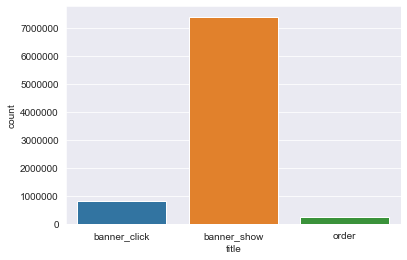

In [17]:
for i in ('order_id', 'page_id'):
        df[i] = df[i].fillna(0).apply(lambda x: X if x == 0 else 1)
        print(df.groupby([i]).size().sort_values(ascending=False).head(2))
        print('\n')
print(df.groupby(['title']).size().sort_values(ascending=False).head())
sns.countplot('title', data=df)
plt.show();
df.drop(['order_id', 'page_id'], axis=1, inplace=True)

Create two binary features:
1) if a client ever clicked on a banner
2) if it is the client's first conversion

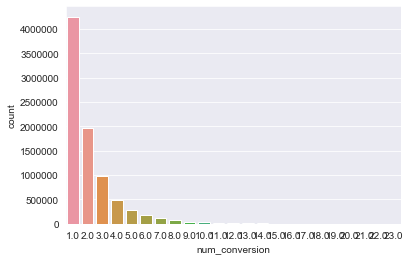

In [18]:
df = df.assign(num_conversion=df.groupby(['user_id'])['time'].rank(method='first', ascending=True))
sns.countplot('num_conversion', data=df)
plt.show();
df['IsBanner_click'] = df['title'].apply(lambda x: 1 if x == 'banner_click' else 0)
df['IsBanner_click'] = df.groupby('user_id').IsBanner_click.transform(np.mean).apply(lambda x: 0 if x == 0 else 1)
df['IsFirst_conversion'] = df['num_conversion'].apply(lambda x: 1 if x == 1 else 0)
df.drop(['user_id', 'title'], axis=1, inplace=True)

In [19]:
df.head()

,product,site_version,time,target,num_conversion,IsBanner_click,IsFirst_conversion
0,sneakers,desktop,2019-01-11 09:24:43,0,1.0,1,1
1,sneakers,desktop,2019-01-09 09:38:51,0,4.0,1,0
2,sports_nutrition,desktop,2019-01-09 09:12:45,0,3.0,1,0
3,company,desktop,2019-01-03 08:58:18,0,1.0,1,1
4,company,desktop,2019-01-03 08:59:15,0,2.0,1,0


Working with Dates

-Seasonality (binary time_IsMorning, time_IsDaylight, time_IsEvening, time_IsNight)

-Time of day (binary time_IsWinter)

-Hour time_Hour

-Day number in the month time_Day

-Day number in the week time_Week_Day

-Year * 100 + Month time_Year_Month

In [20]:
df['time_IsMorning'] = df['time'].apply(lambda ts: 1 if (ts.hour >= 6) and (ts.hour < 10) else 0)
df['time_IsDaylight'] = df['time'].apply(lambda ts: 1 if (ts.hour >= 10) and (ts.hour < 16) else 0)
df['time_IsEvening'] = df['time'].apply(lambda ts: 1 if (ts.hour >= 16) and (ts.hour < 23) else 0)
df['time_Hour'] = df['time'].apply(lambda ts: ts.hour)
df['time_Day'] = df['time'].apply(lambda ts: ts.day)
df['time_Week_Day'] = df['time'].apply(lambda ts: datetime.date(ts.year, ts.month, ts.day).weekday() + 1)
df['time_Year_Month'] = df['time'].apply(lambda ts: ts.year * 100 + ts.month)
df.drop(['time'], axis=1, inplace=True)

In [21]:
df.head()

,product,site_version,target,num_conversion,IsBanner_click,IsFirst_conversion,time_IsMorning,time_IsDaylight,time_IsEvening,time_Hour,time_Day,time_Week_Day,time_Year_Month
0,sneakers,desktop,0,1.0,1,1,1,0,0,9,11,5,201901
1,sneakers,desktop,0,4.0,1,0,1,0,0,9,9,3,201901
2,sports_nutrition,desktop,0,3.0,1,0,1,0,0,9,9,3,201901
3,company,desktop,0,1.0,1,1,1,0,0,8,3,4,201901
4,company,desktop,0,2.0,1,0,1,0,0,8,3,4,201901




product
clothes             1786438
company             1725056
sneakers            1703342
sports_nutrition    1634625
accessories         1621759
dtype: int64


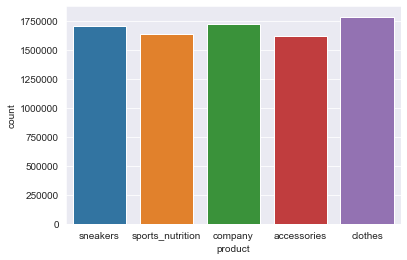



site_version
mobile     6088335
desktop    2382885
dtype: int64


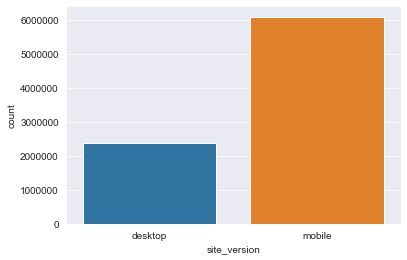

In [22]:
for i in ['product', 'site_version']:
    print('\n')
    print(df.groupby([i]).size().sort_values(ascending=False).head())
    sns.countplot(i, data=df)
    plt.show()

In [23]:
#map version to numeric
df['SV_IsMobile'] = df['site_version'].map({'desktop': 0, 'mobile': 1})
df.drop(['site_version'], axis=1, inplace=True)

In [24]:
#one hot encode products
df = pd.get_dummies(df, columns=['product'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471220 entries, 0 to 8471219
Data columns (total 17 columns):
target                      int64
num_conversion              float64
IsBanner_click              int64
IsFirst_conversion          int64
time_IsMorning              int64
time_IsDaylight             int64
time_IsEvening              int64
time_Hour                   int64
time_Day                    int64
time_Week_Day               int64
time_Year_Month             int64
SV_IsMobile                 int64
product_accessories         uint8
product_clothes             uint8
product_company             uint8
product_sneakers            uint8
product_sports_nutrition    uint8
dtypes: float64(1), int64(11), uint8(5)
memory usage: 816.0 MB


In [26]:
#get dataframe summary
#dfs = ps.DataFrameSummary(full_df)
#print('categoricals: ', dfs.categoricals.tolist())
#print('numerics: ', dfs.numerics.tolist())
#dfs.summary()

#ERROR: ps not defined, 'pandas summary' not a module

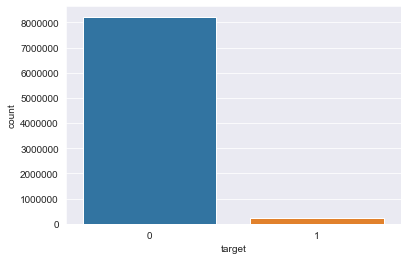

In [27]:
#check class imbalance
sns.countplot('target', data=df)
plt.show()

In [28]:
#manually random-balance classes, select Matrix X and Vector Y
access_df = df.drop(['product_clothes', 'product_company', 'product_sneakers', 'product_sports_nutrition'], axis=1)

/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

Perc. of banner click or show result:  0.5
Perc. of order result:  0.5
Total number of transactions in resampled data:  497444


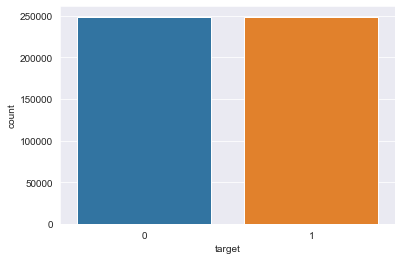

In [29]:
# Number of data points in the minority class
number_records_fraud = len(df[df.target == 1])
fraud_indices = np.array(df[df.target == 1].index)

# Picking the indices of the normal classes
normal_indices = df[df.target == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = df.iloc[under_sample_indices,:]

X = under_sample_data.ix[:, under_sample_data.columns != 'target']
y = under_sample_data.ix[:, under_sample_data.columns == 'target']

# Showing ratio
print("Perc. of banner click or show result: ", len(under_sample_data[under_sample_data.target == 0])/len(under_sample_data))
print("Perc. of order result: ", len(under_sample_data[under_sample_data.target == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))
sns.countplot('target', data=y)
plt.show()

In [30]:
X.shape, y.shape

((497444, 16), (497444, 1))

In [31]:
X.head()

,num_conversion,IsBanner_click,IsFirst_conversion,time_IsMorning,time_IsDaylight,time_IsEvening,time_Hour,time_Day,time_Week_Day,time_Year_Month,SV_IsMobile,product_accessories,product_clothes,product_company,product_sneakers,product_sports_nutrition
60,5.0,1,0,0,1,0,10,3,7,201903,0,0,0,0,0,1
106,9.0,1,0,0,0,1,21,8,5,201902,0,0,0,0,1,0
107,10.0,1,0,0,0,1,19,10,7,201902,0,0,1,0,0,0
165,3.0,0,0,0,1,0,10,6,3,201902,1,0,0,0,0,1
179,1.0,1,1,0,0,1,19,10,7,201902,1,1,0,0,0,0


In [32]:
#data is now balanced and ready for normalization
X.describe()

,num_conversion,IsBanner_click,IsFirst_conversion,time_IsMorning,time_IsDaylight,time_IsEvening,time_Hour,time_Day,time_Week_Day,time_Year_Month,SV_IsMobile,product_accessories,product_clothes,product_company,product_sneakers,product_sports_nutrition
count,497444.000000,497444.000000,497444.000000,497444.000000,497444.000000,497444.000000,497444.000000,497444.000000,497444.000000,497444.000000,497444.000000,497444.000000,497444.000000,497444.000000,497444.000000,497444.000000
mean,2.432786,0.408641,0.445982,0.196740,0.302456,0.333625,12.486833,15.726962,3.986998,201903.225577,0.594941,0.185271,0.328443,0.105487,0.235725,0.145074
std,2.060457,0.491583,0.497074,0.397534,0.459322,0.471508,6.030528,8.687715,1.990026,1.381367,0.490904,0.388518,0.469647,0.307181,0.424452,0.352175
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,201901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,2.000000,201902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,16.000000,4.000000,201903.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,17.000000,23.000000,6.000000,201904.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,31.000000,7.000000,201905.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
#normalize matrix X
stand_X = pd.DataFrame(preprocessing.scale(X), columns=X.columns)

create a class for quick analysis of a feature set
 - withdrawal of the rating of signs on simple algorithms "out of the box" + average rating
 - test of the current feature set on simple models without selection of hyperparameters and regularization
<br>
<br>
test simple models (including KNN) to show precedents

In [34]:
class Feat_Importance:
    df = None
    columns = None
    random_state = None
    ranks = {}
        
    def __init__(self, X, y, columns, random_state=56, show_dict='N', show_plot='N'):
        self.X = X
        self.y = y
        self.names = columns
        self.random_state = random_state
        self.show_dict = show_dict
        self.show_plot = show_plot
        
    def __rank_to_dict(self, ranks, names, order=1):
        minmax = MinMaxScaler()
        ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
        ranks = map(lambda x: round(x, 2), ranks)
        return dict(zip(names, ranks))
    
    def feat_stats(self):
        self.ranks = {}
        self.get_KBest()
        self.get_LogReg()
        self.get_XGBC()
        
    def get_KBest(self):
        selector = SelectKBest(f_classif)
        selector.fit(self.X, self.y)
        scores = selector.scores_
        scores = pd.Series(scores).fillna(0)
        self.ranks["KBest"] = self.__rank_to_dict(scores, self.names)
        if self.show_dict == 'Y': 
            print('===== KBest dict =====\n', self.ranks["KBest"], '\n\n\n')
        if self.show_plot == 'Y': 
            print('===== KBest plot =====\n', self.X.shape)
            plt.bar(range(len(self.names)), -np.log10(selector.pvalues_))
            plt.xticks(range(len(self.names)), self.names, rotation='vertical');
            
    def get_LogReg(self):
        model_LogRegRidge = LogisticRegression(penalty='l2', C=0.15, 
                                               random_state=self.random_state, solver='liblinear', 
                                               n_jobs=-1)
        model_LogRegRidge.fit(self.X, self.y)
        self.ranks["LogRegRidge"] = self.__rank_to_dict(list(map(float, 
                                    model_LogRegRidge.coef_.reshape(len(self.names), -1))),
                                    self.names, order=1)
        
        if self.show_dict == 'Y': 
            print('===== LogRegRidge dict =====\n', self.ranks["LogRegRidge"], '\n\n\n')
        if self.show_plot == 'Y':
            print('===== LogRegRidge plot =====\n', self.X.shape)
            listsRidge = sorted(self.ranks["LogRegRidge"].items(), key=operator.itemgetter(1))
            dfRidge = pd.DataFrame(np.array(listsRidge).reshape(len(listsRidge), 2),
                       columns=['Features', 'Ranks']).sort_values('Ranks')
            dfRidge['Ranks'] = dfRidge['Ranks'].astype(float)
            dfRidge.plot.bar(x='Features', y='Ranks', color='blue')
            plt.xticks(rotation=90)
    
    def get_XGBC(self):
        model_XGBC = XGBClassifier(objective='binary:logistic',
                           max_depth=7, min_child_weight=5,
                           gamma=0, random_state=random_state, n_jobs=-1,
                           learning_rate=0.1, n_estimators=200)
        model_XGBC.fit(self.X, self.y)
        self.ranks["XGBC"] = self.__rank_to_dict(model_XGBC.feature_importances_, self.names)
        if self.show_dict == 'Y': 
            print('===== XGBClassifier dict =====\n', self.ranks["XGBC"], '\n\n\n')
        if self.show_plot == 'Y':
            print('===== XGBClassifier plot =====\n', self.X.shape)
            plot_importance(model_XGBC)
            plt.show()
    
    def stats_df(self):
        r = {}
        for name in self.names:
            r[name] = round(np.mean([self.ranks[method][name] for method in self.ranks.keys()]), 2)
        methods = sorted(self.ranks.keys())
        self.ranks['Mean'] = r
        methods.append('Mean')

        row_index, AllFeatures_columns = 0, ['Feature', 'Scores']
        AllFeats = pd.DataFrame(columns=AllFeatures_columns)
        for name in self.names:
            AllFeats.loc[row_index, 'Feature'] = name
            AllFeats.loc[row_index, 'Scores'] = [self.ranks[method][name] for method in methods]
            row_index += 1
        AllFeatures_only = pd.DataFrame(AllFeats.Scores.tolist(), )
        AllFeatures_only.rename(columns={0: 'KBest', 1: 'LogRegRidge', 2: 'XGB Classifier', 3: 'Mean'}, inplace=True)
        AllFeatures_only = AllFeatures_only[['KBest', 'LogRegRidge', 'XGB Classifier', 'Mean']]
        AllFeatures_compare = AllFeats.join(AllFeatures_only).drop(['Scores'], axis=1)
        return AllFeatures_compare
    
    def simple_test(self):
        x_train, x_valid, y_train, y_valid = train_test_split(self.X, self.y, test_size=0.3, random_state=random_state+37)
        mods = ('BernoulliNB', 'KNeighborsClassifier', 'RandomForestClassifier')
        for nu, model in enumerate([BernoulliNB(), KNeighborsClassifier(n_jobs=-1), 
                      RandomForestClassifier(n_jobs=-1)]):
            model.fit(x_train, y_train)
            predicted = model.predict(x_valid)
            print(mods[nu])
            print('------ accuracy ------\n', metrics.accuracy_score(y_valid, predicted))
            #print('------ confusion_matrix ------\n', metrics.confusion_matrix(y_valid, predicted))
            print('------ roc_auc_score ------\n', metrics.roc_auc_score(y_valid, predicted))
            print('\n')

In [35]:
fi = Feat_Importance(stand_X, y, stand_X.columns)
fi.feat_stats()
fi_df = fi.stats_df()
display(fi_df.sort_values(by=['Mean'], ascending=[False]))

/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was e

,Feature,KBest,LogRegRidge,XGB Classifier,Mean
13,product_company,1.00,0.00,1.00,0.67
12,product_clothes,0.57,1.00,0.03,0.53
10,SV_IsMobile,0.57,0.54,0.06,0.39
1,IsBanner_click,0.16,0.90,0.04,0.37
14,product_sneakers,0.06,0.93,0.01,0.33
15,product_sports_nutrition,0.15,0.79,0.03,0.32
0,num_conversion,0.12,0.80,0.01,0.31
11,product_accessories,0.00,0.87,0.00,0.29
2,IsFirst_conversion,0.11,0.73,0.00,0.28
6,time_Hour,0.00,0.82,0.01,0.28


In [36]:
fi.simple_test()

/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB
------ accuracy ------
 0.7120160285189702
------ roc_auc_score ------
 0.711924538113304




/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNeighborsClassifier
------ accuracy ------
 0.7272806465014675
------ roc_auc_score ------
 0.727248877228917




/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier
------ accuracy ------
 0.7124716887572538
------ roc_auc_score ------
 0.7124613635087118




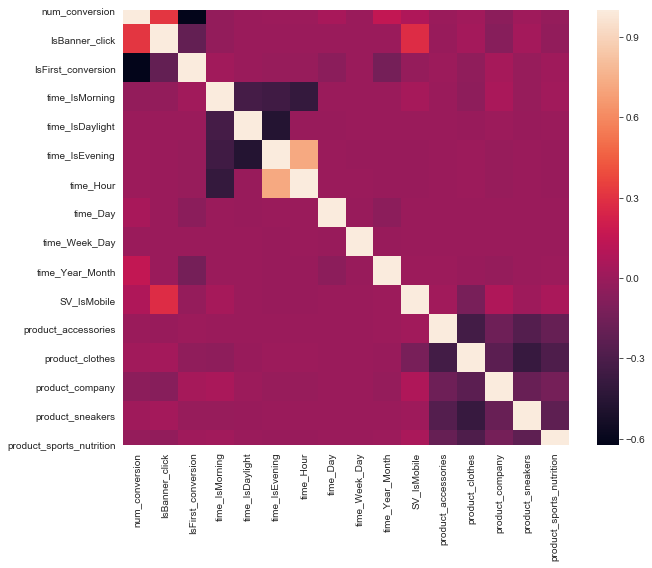

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(stand_X.corr(), xticklabels=stand_X.columns, yticklabels=stand_X.columns)

In [42]:
#remove features with high correlation values
stand_X = stand_X.drop(['IsFirst_conversion'], axis=1)

KeyError: "['IsFirst_conversion'] not found in axis"

In [46]:
# drop other highly correlated columns
stand_X = stand_X.drop(['time_IsDaylight', 'time_IsEvening'], axis=1)

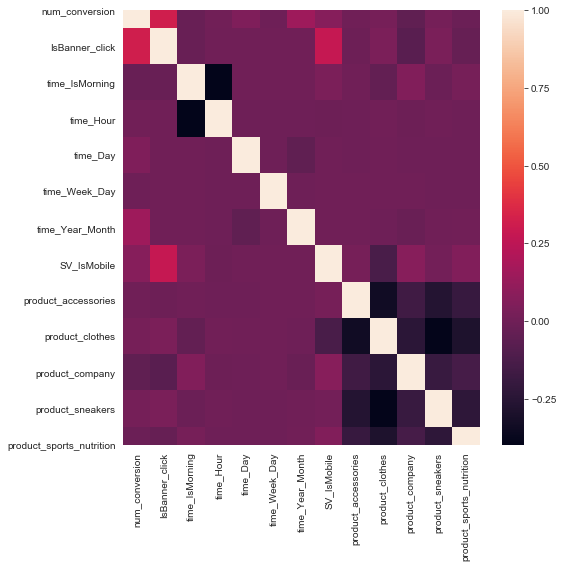

In [47]:
plt.figure(figsize=(8, 8))
sns.heatmap(stand_X.corr(), xticklabels=stand_X.columns, yticklabels=stand_X.columns)

In [48]:
#test feature importance for feature subset
fi = Feat_Importance(stand_X, y, stand_X.columns)
fi.feat_stats()
fi_df = fi.stats_df()
display(fi_df.sort_values(by=['Mean'], ascending=[False]))

/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was e

,Feature,KBest,LogRegRidge,XGB Classifier,Mean
10,product_company,1.00,0.00,1.00,0.67
9,product_clothes,0.57,1.00,0.03,0.53
7,SV_IsMobile,0.57,0.54,0.07,0.39
1,IsBanner_click,0.16,0.90,0.04,0.37
11,product_sneakers,0.06,0.93,0.01,0.33
0,num_conversion,0.12,0.82,0.01,0.32
12,product_sports_nutrition,0.15,0.79,0.03,0.32
2,time_IsMorning,0.19,0.65,0.02,0.29
8,product_accessories,0.00,0.87,0.00,0.29
3,time_Hour,0.00,0.73,0.01,0.25


In [49]:
fi.simple_test()

/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB
------ accuracy ------
 0.718864333864937
------ roc_auc_score ------
 0.7187811724167212




/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNeighborsClassifier
------ accuracy ------
 0.7258868622431885
------ roc_auc_score ------
 0.7258553149456006




/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier
------ accuracy ------
 0.7105954407172628
------ roc_auc_score ------
 0.710585295366922




In [50]:
#split into train/test samples
x_train, x_valid, y_train, y_valid = train_test_split(stand_X, y, test_size=0.3, random_state=random_state)

In [51]:
#Test the current set of features on effective models with the selection of hyperparameters
r_for = RandomForestClassifier()
print(r_for)
for_params = {'max_depth': np.arange(4, 10), 'max_features': np.arange(0.25, 0.5, 1), 'n_estimators': [30, 50, 60]}
for_grid = GridSearchCV(r_for, for_params, cv=2, n_jobs=-1)
for_grid.fit(x_train, y_train)
print('best score / best params: ', for_grid.best_score_, for_grid.best_params_)
y_pred = for_grid.predict(x_valid)
print('classification_report: \n', metrics.classification_report(y_pred, y_valid))
print('accuracy_score: ', metrics.accuracy_score(y_pred, y_valid))
print('roc_auc_score: ', metrics.roc_auc_score(y_pred, y_valid))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


best score / best params:  0.7586714913414319 {'max_depth': 9, 'max_features': 0.25, 'n_estimators': 60}
classification_report: 
               precision    recall  f1-score   support

           0       0.71      0.79      0.75     67261
           1       0.81      0.74      0.77     81973

    accuracy                           0.76    149234
   macro avg       0.76      0.76      0.76    149234
weighted avg       0.77      0.76      0.76    149234

accuracy_score:  0.760965999705161
roc_auc_score:  0.7633376885527625


In [52]:
log_r = LogisticRegression()
grid_values = {'penalty': ['l2'], 'C': [0.0001, 0.001, 0.01, 0.1]}
lr_grid = GridSearchCV(log_r, param_grid=grid_values, cv=2, n_jobs=-1)
lr_grid.fit(x_train, y_train)
print('best score / best params: ', lr_grid.best_score_, lr_grid.best_params_)
y_pred = lr_grid.predict(x_valid)
print('classification_report: \n', metrics.classification_report(y_pred, y_valid))
print('accuracy_score: ', metrics.accuracy_score(y_pred, y_valid))
print('roc_auc_score: ', metrics.roc_auc_score(y_pred, y_valid))

/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


best score / best params:  0.7296459033341949 {'C': 0.01, 'penalty': 'l2'}
classification_report: 
               precision    recall  f1-score   support

           0       0.69      0.75      0.72     69103
           1       0.77      0.72      0.74     80131

    accuracy                           0.73    149234
   macro avg       0.73      0.73      0.73    149234
weighted avg       0.73      0.73      0.73    149234

accuracy_score:  0.7300615141321682
roc_auc_score:  0.7311833344758802


In [53]:
xgb_m = XGBClassifier()
xgb_params = [
    {"n_estimators": [300, 350],
     "max_depth": [3,  5],
     "learning_rate": [0.01, 0.05]}
]
xgb_grid = GridSearchCV(xgb_m, xgb_params, cv=2, refit=True, verbose=1, n_jobs=-1)
xgb_grid.fit(x_train, y_train)
print('best score / best params: ', xgb_grid.best_score_, xgb_grid.best_params_)
y_pred = xgb_grid.predict(x_valid)
print('classification_report: \n', metrics.classification_report(y_pred, y_valid))
print('accuracy_score: ', metrics.accuracy_score(y_pred, y_valid))
print('roc_auc_score: ', metrics.roc_auc_score(y_pred, y_valid))

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed: 12.4min finished
/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


best score / best params:  0.7651503403118808 {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 350}
classification_report: 
               precision    recall  f1-score   support

           0       0.73      0.79      0.76     68385
           1       0.81      0.75      0.78     80849

    accuracy                           0.77    149234
   macro avg       0.77      0.77      0.77    149234
weighted avg       0.77      0.77      0.77    149234

accuracy_score:  0.7664071190211346
roc_auc_score:  0.7681184538610936


In [54]:
#enhanced sample clustering. The goal is to blur product_company in one cluster
cluster_stand_df = stand_X
cluster_stand_df['target'] = preprocessing.scale(y)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=random_state).fit(cluster_stand_df)
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 216802]
 [     1 163382]
 [     2 117260]]


In [55]:
cluster_df = X[[i for i in stand_X.columns if i != 'target']]
cluster_df['target'] = y
cluster_df['Cluster'] = kmeans.labels_ # 497444

/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
cluster_df['Cluster'].value_counts(normalize=True)


0    0.435832
1    0.328443
2    0.235725
Name: Cluster, dtype: float64

Interpretation:
<br>

Cluster 2 - customer share 23.57%. The share of “buying” customers is 0.69. Customers buying product_clothes and most often clicking on the banner.
<br>
Cluster 1 - customer share 32.84%. The proportion of "buying" customers is 0.578. The most conversions. The largest share of desktop users.
<br>
Cluster 0 - customer share 43.58%. The share of "buying" customers is 0.315. Customers in the categories product_accessories, product_company, product_sports_nutrition. Least click and order products. The target audience. The largest share of "mobile" users. Perhaps the banner is not very attractive in the mobile version.

In [57]:
cluster_df.groupby('Cluster').mean().sort_values(by=['target'], ascending=False)

,num_conversion,IsBanner_click,time_IsMorning,time_Hour,time_Day,time_Week_Day,time_Year_Month,SV_IsMobile,product_accessories,product_clothes,product_company,product_sneakers,product_sports_nutrition,target
Cluster,,,,,,,,,,,,,,
1,2.502540,0.436266,0.172179,12.557815,15.731078,3.988040,201903.219633,0.505833,0.000000,1.0,0.000000,0.0,0.000000,0.689886
2,2.502268,0.440858,0.187148,12.507624,15.728057,3.981724,201903.235298,0.608707,0.000000,0.0,0.000000,1.0,0.000000,0.577512
0,2.342640,0.370398,0.220436,12.422095,15.723268,3.989064,201903.224800,0.654648,0.425098,0.0,0.242037,0.0,0.332866,0.314979


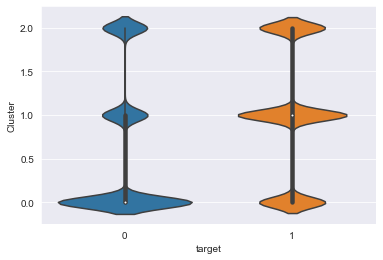

In [58]:
ax = sns.violinplot(x='target', y='Cluster',
                         data=cluster_df, height=4, aspect=.7)
plt.show();

In [59]:
display(fi_df.sort_values(by=['Mean'], ascending=[False]))

,Feature,KBest,LogRegRidge,XGB Classifier,Mean
10,product_company,1.00,0.00,1.00,0.67
9,product_clothes,0.57,1.00,0.03,0.53
7,SV_IsMobile,0.57,0.54,0.07,0.39
1,IsBanner_click,0.16,0.90,0.04,0.37
11,product_sneakers,0.06,0.93,0.01,0.33
0,num_conversion,0.12,0.82,0.01,0.32
12,product_sports_nutrition,0.15,0.79,0.03,0.32
2,time_IsMorning,0.19,0.65,0.02,0.29
8,product_accessories,0.00,0.87,0.00,0.29
3,time_Hour,0.00,0.73,0.01,0.25


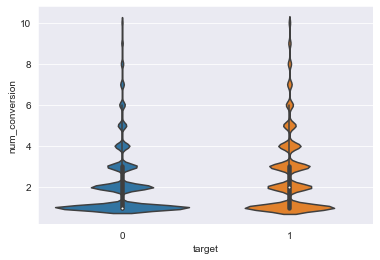

In [60]:
ax = sns.violinplot(x='target', y='num_conversion',
                         data=cluster_df[cluster_df['num_conversion'] <= 10], height=4, aspect=.7)
plt.show();

- IsBanner_click - people who have ever clicked on a banner (without an order) are more likely to make a purchase.
- time_IsMorning - in the morning, shopping activity is low.

IsBanner_click


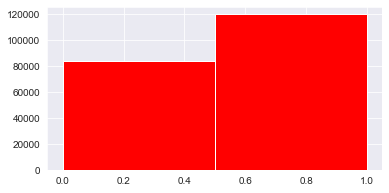

time_IsMorning


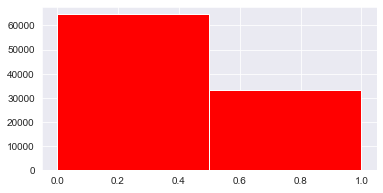

SV_IsMobile


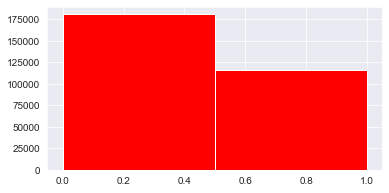

In [61]:
feat = [f for f in cluster_df.columns if 'Is' in f]
for i in feat:
    print(i)
    plt.figure()
    tmp = cluster_df[cluster_df[i] == 1]
    tmp['target'].hist(figsize=(6, 3), bins=2, color = 'red')
    plt.show();

The most significant features:

- time_Day - buy more at the end of the month.
<br>
- time_Hour - buy more at night.
<br>
- time_Year_Month - Shopping activity increases in the months with fewer weekends and holidays.


time_IsMorning


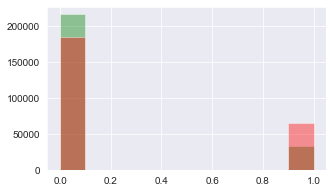

time_Hour


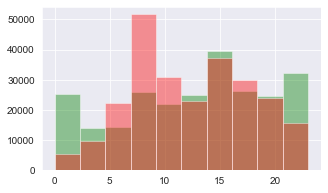

time_Day


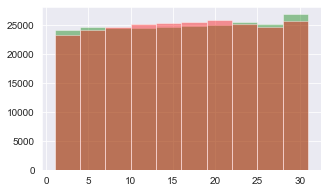

time_Week_Day


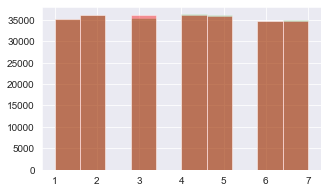

time_Year_Month


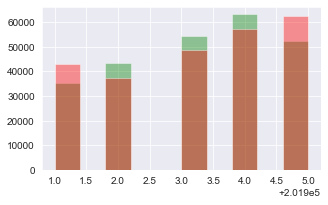

In [62]:
feat = [f for f in cluster_df.columns if 'time' in f]
for i in feat:
    print(i)
    plt.figure()
    cluster_df[cluster_df['target'] == 1][i].hist(figsize=(5, 3), alpha=0.4, color = 'green')
    cluster_df[cluster_df['target'] == 0][i].hist(figsize=(5, 3), alpha=0.4, color = 'red')
    plt.show();

- product_clothes - product_clothes is most actively sold, the largest number of banner impressions.
<br>
- product_sneakers - 2nd product in terms of popularity and sales.
<br>
- product_accessories and product_sports_nutrition need to research sales figures, add features.

product_accessories


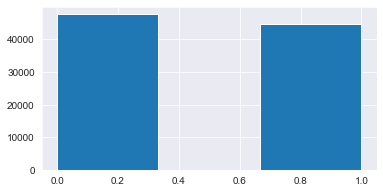

product_clothes


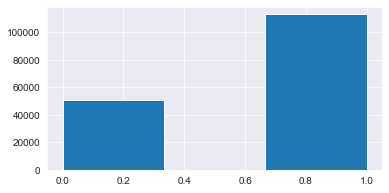

product_sneakers


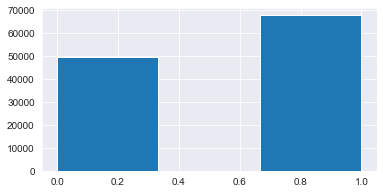

product_sports_nutrition


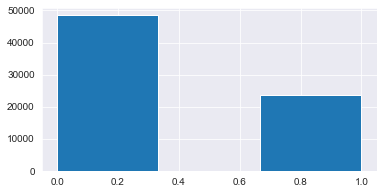

In [64]:
feat = [f for f in cluster_df.columns if 'product' in f and '_company' not in f]
for i in feat:
    print(i)
    plt.figure()
    tmp = cluster_df[cluster_df[i] == 1]
    tmp['target'].hist(figsize=(6, 3), bins=3)
    plt.show();